<a href="https://colab.research.google.com/github/Long-Live-Lord-Voldemort/Long-Live-Lord-Voldemort/blob/main/StockPrice_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 7.4 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = yf.download("TSLA")

[*********************100%***********************]  1 of 1 completed


In [5]:
df.tail(11)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-31,1073.439941,1082.000000,1054.589966,1056.780029,1056.780029,13528700
2022-01-03,1147.750000,1201.069946,1136.040039,1199.780029,1199.780029,34643800
2022-01-04,1189.550049,1208.000000,1123.050049,1149.589966,1149.589966,33416100
2022-01-05,1146.650024,1170.339966,1081.010010,1088.119995,1088.119995,26706600
2022-01-06,1077.000000,1088.000000,1020.500000,1064.699951,1064.699951,30112200
2022-01-07,1080.369995,1080.930054,1010.000000,1026.959961,1026.959961,27919000
2022-01-10,1000.000000,1059.099976,980.000000,1058.119995,1058.119995,30605000
2022-01-11,1053.670044,1075.849976,1038.819946,1064.400024,1064.400024,22021100
2022-01-12,1078.849976,1114.839966,1072.589966,1106.219971,1106.219971,27913000


In [8]:
returns = np.log(1+ df['Adj Close'].pct_change())
returns.tail(11)

Date
2021-12-31   -0.012750
2022-01-03    0.126912
2022-01-04   -0.042733
2022-01-05   -0.054954
2022-01-06   -0.021758
2022-01-07   -0.036090
2022-01-10    0.029891
2022-01-11    0.005918
2022-01-12    0.038537
2022-01-13   -0.069876
2022-01-14    0.017346
Name: Adj Close, dtype: float64

In [12]:
mu, sigma = returns.mean(), returns.std()

In [15]:
simulation_returns = np.random.normal(mu, sigma, 252)

In [18]:
initial = df['Adj Close'].iloc[-1]

In [19]:
initial * (simulation_returns+1).cumprod()

array([1032.2809537 , 1047.16210323, 1105.45959586, 1155.19842721,
       1195.63746972, 1128.89360948, 1167.86538392, 1253.45691752,
       1309.35825101, 1386.21406183, 1402.41222305, 1311.35548327,
       1289.31397908, 1330.74709888, 1301.83527174, 1361.7387311 ,
       1403.98810512, 1407.08761409, 1369.47653743, 1449.82165503,
       1425.12982149, 1383.71822431, 1375.31501657, 1415.54892419,
       1404.69311761, 1352.94070582, 1335.09596396, 1356.57243116,
       1427.46744125, 1450.19551804, 1461.43760148, 1401.78056765,
       1491.67624861, 1618.92965438, 1582.03649785, 1509.21199881,
       1545.11707799, 1513.75991107, 1501.78113779, 1517.80347402,
       1529.10876717, 1645.7786863 , 1641.04671614, 1714.94079044,
       1759.03162289, 1782.55150312, 1724.53207099, 1701.99064448,
       1692.50564253, 1766.79563002, 1726.77957507, 1807.02606921,
       1888.04680908, 1927.54241298, 1859.87964789, 1816.18973959,
       1757.43802233, 1889.0384314 , 1882.544148  , 1840.89996

In [20]:
simulated_prices = initial * (simulation_returns+1).cumprod()

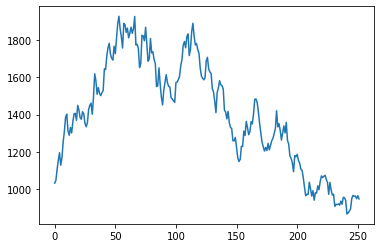

In [21]:
plt.plot(simulated_prices)

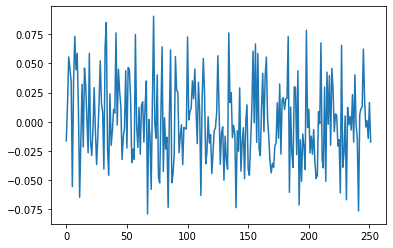

In [22]:
plt.plot(simulation_returns)

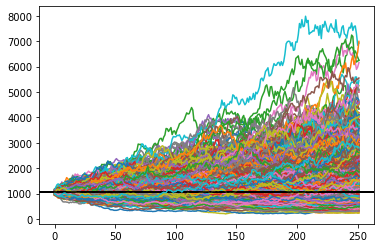

In [23]:
for i in range(1000):
  simulation_returns = np.random.normal(mu, sigma, 252)
  simulated_prices = initial * (simulation_returns+1).cumprod()
  plt.axhline(initial, c='k')
  plt.plot(simulated_prices)

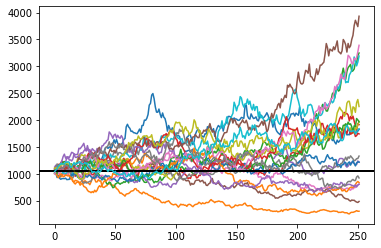

In [24]:
for i in range(20):
  simulation_returns = np.random.normal(mu, sigma, 252)
  simulated_prices = initial * (simulation_returns+1).cumprod()
  plt.axhline(initial, c='k')
  plt.plot(simulated_prices)